In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [5]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 [==============================] - 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [14]:
#using only a single feature from dataset

boston_features = {'Average Number of Rooms': 5,}
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d)

X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

[6.142 7.61  4.97  6.037 6.376 5.708 5.536 5.468 5.628 5.019 6.404 4.628
 5.572 6.251 5.613 5.957 7.016 6.345 6.162 6.727 6.202 6.595 7.135 6.575
 5.895 6.794 6.012 7.185 5.813 5.569 6.315 6.297 6.301 5.935 7.024 6.415
 5.599 5.701 6.041 6.279 5.454 6.211 6.316 6.411 5.887 5.924 5.822 6.674
 6.842 5.713 5.968 6.461 7.358 6.565 5.88  5.87  6.348 6.193 6.854 6.546
 6.004 6.538 6.185 5.836 6.525 6.436 5.757 5.818 5.852 5.404 5.682 6.629
 7.178 5.914 6.096 5.631 5.896 5.637 5.966 5.403 6.678 7.47  5.456 6.453
 6.372 6.31  6.405 7.853 4.926 6.103 6.75  8.034 6.009 7.765 8.069 6.358
 6.975 6.015 6.8   6.43  7.645 8.337 6.113 6.77  5.757 6.487 6.162 6.069
 5.565 5.96  6.229 7.929 6.715 5.39  6.383 7.147 6.006 6.004 5.928 5.936
 6.315 5.727 6.152 7.454 6.968 5.95  6.232 6.951 7.014 6.49  5.786 5.731
 7.412 6.782 5.67  5.879 6.545 8.704 5.927 5.683 5.399 6.474 6.193 6.326
 6.976 6.433 6.762 6.167 6.657 6.431 5.936 6.939 6.163 6.03  5.891 5.404
 5.531 6.481 3.863 5.807 6.226 7.007 6.495 7.691 6.

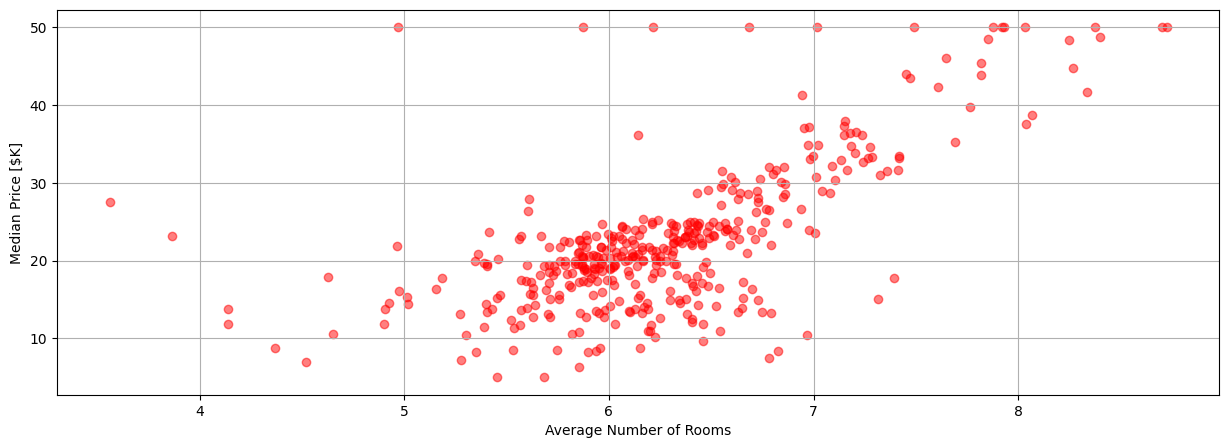

In [16]:
plt.figure(figsize=(15, 5))
 
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='red', alpha=0.5)

In [17]:
model = Sequential()

model.add(Dense(units = 1, input_shape = (1, )))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.005), loss = 'mse')

In [21]:
history = model.fit(X_train_1d, y_train, batch_size = 16, epochs = 101, validation_split = 0.3)

Epoch 1/101
18/18 [==============================] - 1s 12ms/step - loss: 487.2260 - val_loss: 554.8461
Epoch 2/101
18/18 [==============================] - 0s 3ms/step - loss: 457.1738 - val_loss: 526.1039
Epoch 3/101
18/18 [==============================] - 0s 4ms/step - loss: 431.5843 - val_loss: 499.4239
Epoch 4/101
18/18 [==============================] - 0s 3ms/step - loss: 407.3747 - val_loss: 473.5194
Epoch 5/101
18/18 [==============================] - 0s 4ms/step - loss: 383.6446 - val_loss: 448.0273
Epoch 6/101
18/18 [==============================] - 0s 4ms/step - loss: 360.7916 - val_loss: 423.7521
Epoch 7/101
18/18 [==============================] - 0s 4ms/step - loss: 338.9505 - val_loss: 400.0718
Epoch 8/101
18/18 [==============================] - 0s 4ms/step - loss: 318.0480 - val_loss: 377.8644
Epoch 9/101
18/18 [==============================] - 0s 3ms/step - loss: 297.9386 - val_loss: 355.9414
Epoch 10/101
18/18 [==============================] - 0s 4ms/step - loss

In [22]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

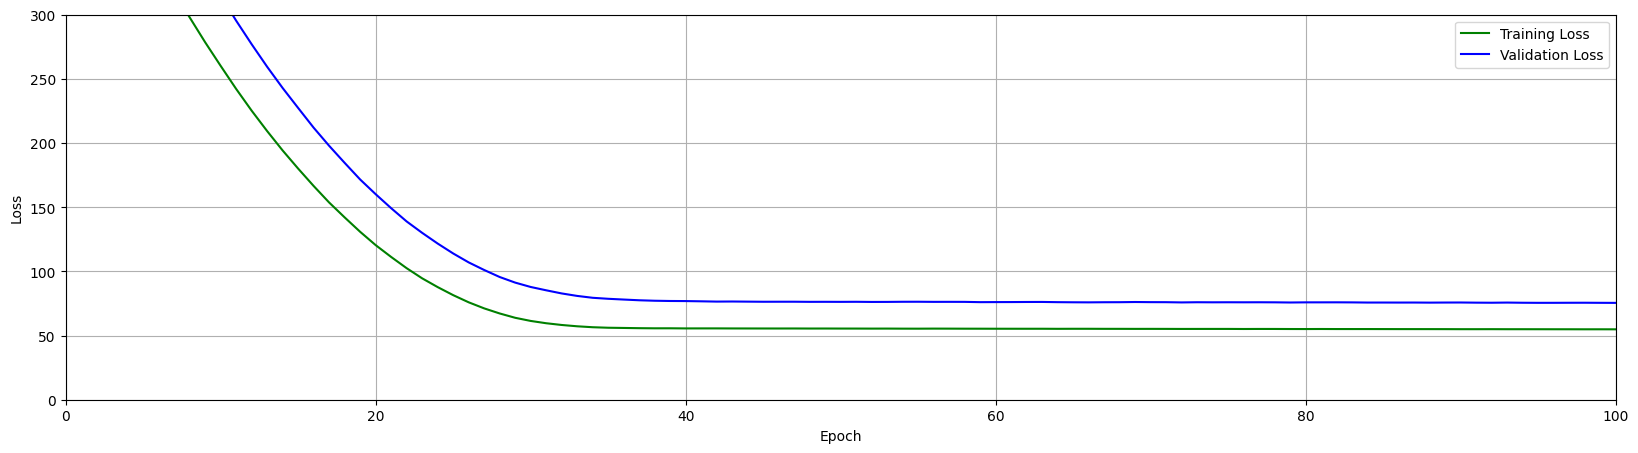

In [24]:
plot_loss(history)

In [25]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))


1/1 [==============================] - 0s 160ms/step
Predicted price of a home with 3 rooms: $11.6K
Predicted price of a home with 4 rooms: $14.9K
Predicted price of a home with 5 rooms: $18.1K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.6K


In [26]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)
 
# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 110ms/step


In [29]:
def plot_data(x_data, y_data, x, y, title=None):
     
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='red', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

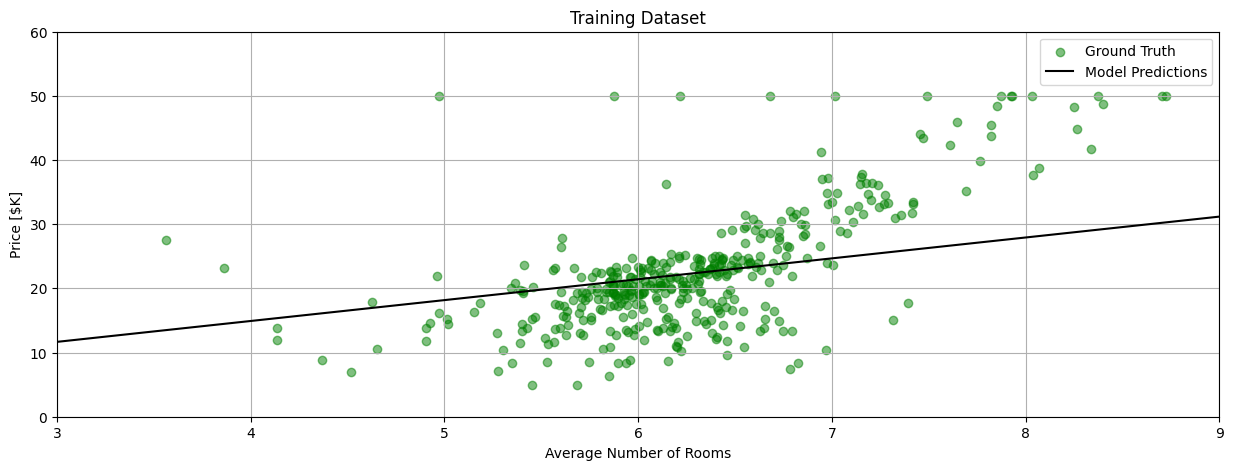

In [28]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

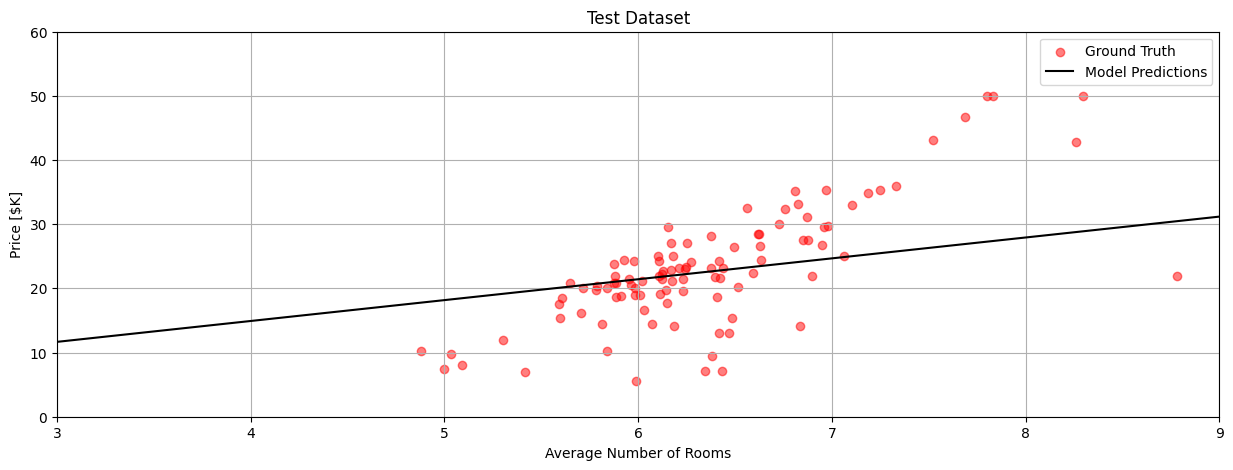

In [31]:
#test data
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')